In [1]:
model_name = 'skt/kogpt2-base-v2'
save_dir = model_name.replace('/', '__') + '__data-add'

### SFT 데이터셋 확인

In [2]:
import json 
data_path_1_SFT = '/aiffel/KoChatGPT/data_kochatgpt/kochatgpt_1_SFT.jsonl' 
with open(data_path_1_SFT, "r", encoding='utf-8-sig') as json_file:
    list_data_dict = json.load(json_file)

print(len(list_data_dict)) # 12000
list_data_dict[:3]

12000


[{'prompt': '불고기용 고기 한우에요?',
  'completion': "'저는 인공지능 챗봇이며, 직접적으로 식품에 관한 정보를 가지고 있지 않습니다. 하지만 일반적으로 불고기용 고기는 한우, 쇠고기, 돼지고기 등 다양한 종류의 고기를 사용합니다. 하지만 한우는 대표적인 고급 육류로 알려져 있기 때문에, 한우를 사용하는 경우도 많습니다. 알러지나 개별 건강 상태에 따라 다를 수 있으니 충분한 정보 수집 후에 선택해 주시기 바랍니다.",
  'tokens': 193},
 {'prompt': '쓰던 앱이 유료로 전환됐어',
  'completion': "'어떤 앱인지 모르기 때문에 정확한 답변을 드리기 어렵습니다. 하지만, 일반적으로 유료 전환된 앱은 기존 무료 앱에서 추가적인 기능이나 서비스를 제공하는 경우가 많습니다. 이 경우, 유료 전환 이전 가격이 매우 저렴하거나 무료인 경우가 많으므로, 앱을 계속 사용하려면 추가적인 비용을 지불해야 할 수 있습니다. 하지만, 유료 전환 이후에는 기존 사용자 또는 새로운 사용자 모두가 추가 기능과 높은 품질의 서비스를 이용할 수 있게 됩니다. 따라서, 앱 개발자는 유료 모델로 전환함으로써 앱의 수익을 증가시키고 더 나은 서비스를 제공할 수 있습니다.",
  'tokens': 288},
 {'prompt': '여친이랑 다툼',
  'completion': "'저는 인공지능이기 때문에 여친과의 다툼에 대해서는 조언을 드릴 수는 없습니다. 하지만 다투게 되면 상대방의 말을 경청하는 태도와 서로의 감정을 존중하는 것이 중요합니다. 논리적이고 차분한 대화를 통해 문제를 해결해보세요. 그리고 서로를 이해하고 서로의 의견을 수용하는 것이 중요합니다.",
  'tokens': 153}]

In [3]:
import pandas as pd
df = pd.read_json(data_path_1_SFT)

In [4]:
print(df['prompt'].duplicated().sum())
df[df['prompt'].duplicated()]

54


,prompt,completion,tokens
1612,비 오는데?,"'저는 비가 내리는지 아닌지 알 수 없습니다. 저는 인공지능 챗봇이며, 현재 위치와...",107
1755,이거는 얼마예요?,'저는 가격을 알 수 없습니다. 어떤 물건에 대해 물어보시는 건가요? 그것에 맞는 ...,78
3459,딱 좋아,"""Translation: I like it a lot / It's just righ...",25
4061,얼마에요?,"'제가 가지고 있는 AI 챗봇이며, 사용에 따라 다른 서비스에 연동될 수 있으므로 ...",92
4387,지금 배달되나요?,"'죄송하지만, 저는 주문하신 음식이 언제 배달될지 알 수 없습니다. 배달 시간은 음...",117
4552,지금 배달 가능한가요?,"'죄송합니다, 저는 AI 어시스턴트이고 배달 서비스를 제공하지 않습니다. 배달 가능...",77
4582,영수증 좀 주세요,'저는 인공지능 챗봇입니다. 영수증을 발급드리는 것이 불가능합니다. 이용해주셔서 감...,64
4665,현금 영수증 해주세요,'제가 따로 현금 영수증을 발행할 수는 없습니다. 하지만 매장에서 직접 현금 영수증...,113
4793,,"'As an AI language model, I do not have a phys...",63
5328,자니?,"'네, 저는 인공지능 어시스턴트입니다. 무엇을 도와드릴까요?",44


In [5]:
df = df.drop_duplicates(subset=['prompt'], keep='first', inplace=False, ignore_index=False)

In [6]:
print(df['prompt'].duplicated().sum())

0


In [7]:
len(df)

11946

In [8]:
df['_completion'] = df['completion'].apply(lambda s: s[1:])

In [9]:
df.head()

,prompt,completion,tokens,_completion
0,불고기용 고기 한우에요?,"'저는 인공지능 챗봇이며, 직접적으로 식품에 관한 정보를 가지고 있지 않습니다. 하...",193,"저는 인공지능 챗봇이며, 직접적으로 식품에 관한 정보를 가지고 있지 않습니다. 하지..."
1,쓰던 앱이 유료로 전환됐어,"'어떤 앱인지 모르기 때문에 정확한 답변을 드리기 어렵습니다. 하지만, 일반적으로 ...",288,"어떤 앱인지 모르기 때문에 정확한 답변을 드리기 어렵습니다. 하지만, 일반적으로 유..."
2,여친이랑 다툼,'저는 인공지능이기 때문에 여친과의 다툼에 대해서는 조언을 드릴 수는 없습니다. 하...,153,저는 인공지능이기 때문에 여친과의 다툼에 대해서는 조언을 드릴 수는 없습니다. 하지...
3,술 먹고 싶어,"'술은 알코올이 함유된 음료수이며, 건강에 나쁜 영향을 미칠 수 있습니다. 따라서 ...",189,"술은 알코올이 함유된 음료수이며, 건강에 나쁜 영향을 미칠 수 있습니다. 따라서 술..."
4,잊고싶다.,'저도 인공지능 엔진으로써 사용자의 개인정보나 감정을 침해할 수 없습니다. 그렇기 ...,147,저도 인공지능 엔진으로써 사용자의 개인정보나 감정을 침해할 수 없습니다. 그렇기 때...


In [10]:
import re

def contains_korean(text):
    # 한글 유니코드 범위를 사용하여 정규 표현식 패턴 정의
    korean_pattern = re.compile('[\uac00-\ud7a3]+')
    return bool(korean_pattern.search(text))

In [11]:
df['prompt'].apply(contains_korean).sum()

11945

In [12]:
df['completion'].apply(contains_korean).sum()

11676

생각보다 한글이 없는데 데이터가 많은데 이것들은 다 날려주도록함.

In [13]:
df = df[df['completion'].apply(contains_korean)]

(array([5.240e+03, 4.527e+03, 1.222e+03, 3.440e+02, 1.900e+02, 1.010e+02,
        3.500e+01, 1.000e+01, 6.000e+00, 1.000e+00]),
 array([  17. ,  126.4,  235.8,  345.2,  454.6,  564. ,  673.4,  782.8,
         892.2, 1001.6, 1111. ]),
 <BarContainer object of 10 artists>)

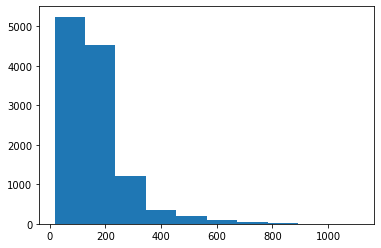

In [14]:
import matplotlib.pyplot as plt
tokens = df['tokens']
plt.hist(tokens)

token 길이 300 넘어가는 것도 날림.

In [15]:
df['tokens'].apply(lambda t: t <= 300).sum()

10744

In [16]:
df = df[df['tokens'].apply(lambda t: t <= 300)]

In [17]:
!pip install koeda

     |████████████████████████████████| 566 kB 7.3 MB/s            


In [18]:
prompt = df['prompt'].to_numpy()
completion = df['_completion'].to_numpy()

In [19]:
prompt[:10]

array(['불고기용 고기 한우에요?', '쓰던 앱이 유료로 전환됐어', '여친이랑 다툼', '술 먹고 싶어', '잊고싶다.',
       '입냄새 안나나?', '새로운 사랑은 찾아와',
       '이명박 대통형은 어느 경축사를 통해 집권 후반기 국정운영에 대한 언급을 하였나?', '금액은 얼마에요',
       '리처드 닉슨이 43대 부통령직을 수행한 년도는?'], dtype=object)

In [20]:
completion[:10]

array(['저는 인공지능 챗봇이며, 직접적으로 식품에 관한 정보를 가지고 있지 않습니다. 하지만 일반적으로 불고기용 고기는 한우, 쇠고기, 돼지고기 등 다양한 종류의 고기를 사용합니다. 하지만 한우는 대표적인 고급 육류로 알려져 있기 때문에, 한우를 사용하는 경우도 많습니다. 알러지나 개별 건강 상태에 따라 다를 수 있으니 충분한 정보 수집 후에 선택해 주시기 바랍니다.',
       '어떤 앱인지 모르기 때문에 정확한 답변을 드리기 어렵습니다. 하지만, 일반적으로 유료 전환된 앱은 기존 무료 앱에서 추가적인 기능이나 서비스를 제공하는 경우가 많습니다. 이 경우, 유료 전환 이전 가격이 매우 저렴하거나 무료인 경우가 많으므로, 앱을 계속 사용하려면 추가적인 비용을 지불해야 할 수 있습니다. 하지만, 유료 전환 이후에는 기존 사용자 또는 새로운 사용자 모두가 추가 기능과 높은 품질의 서비스를 이용할 수 있게 됩니다. 따라서, 앱 개발자는 유료 모델로 전환함으로써 앱의 수익을 증가시키고 더 나은 서비스를 제공할 수 있습니다.',
       '저는 인공지능이기 때문에 여친과의 다툼에 대해서는 조언을 드릴 수는 없습니다. 하지만 다투게 되면 상대방의 말을 경청하는 태도와 서로의 감정을 존중하는 것이 중요합니다. 논리적이고 차분한 대화를 통해 문제를 해결해보세요. 그리고 서로를 이해하고 서로의 의견을 수용하는 것이 중요합니다.',
       '술은 알코올이 함유된 음료수이며, 건강에 나쁜 영향을 미칠 수 있습니다. 따라서 술을 마시기 전에 본인의 건강 상태와 함께 적당한 양을 마시는 것이 중요합니다. 술을 마시기 전에 반드시 20세 이상인지 확인하시고, 규정된 양 이내에서 적절하게 즐기시길 바랍니다. 또한 술을 마시고 운전하는 것은 절대 금지하시기 바랍니다.',
       '저도 인공지능 엔진으로써 사용자의 개인정보나 감정을 침해할 수 없습니다. 그렇기 때문에 어떤 것을 잊고 싶다는 말씀인지, 그리고 그것이 우선적으로 해결되어야 할 문제인지 등에 대해 조금 

In [33]:
from koeda import EDA

eda = EDA(alpha_sr=0,
              alpha_ri=0,
              alpha_rs=0.1,
              prob_rd=0.1)

In [34]:
eda(completion[:10].tolist())

['저는 인공지능 챗봇, 직접적으로 식품에 관 정보를 가지 있지 않습니다. 하지만 일반적으로 불고기용 고기는 한우, 쇠고기 돼지고기 등 다양한 종류의 를 사용합니다. 하지만 한우는 대표적 고급 육류로 알려져 있기 때문에, 한우를 하는 도 많습니다. 알러지나 개별 건강 상태에 다를 수 있으니 충분한 정보 수집 에 선택해 주시기 바랍니다.',
 '어떤 앱인지 모르기 때문에 정확한 답변을 드리기 어렵습니다. 하지만, 일반적으로 유료 전환된 앱은 기존 무료 앱에서 추가적인 기능이나 서비스를 제공하는 경우가 많습니다. 이 경우, 유료 전환 운수 가격이 매우 저렴하거나 무료인 경우가 많으므로, 앱을 계속 사용하려면 추가적인 비용을 지불해야 할 수 있습니다. 하지만, 유료 전환 이후에는 기존 사용자 또는 새로운 사용자 모두가 추가 기능과 높은 품질의 서비스를 이용할 수 있게 됩니다. 따라서, 앱 개발자는 유료 모델로 전환함으로써 앱의 수익을 증가시키고 더 나은 서비스를 제공할 수 있습니다.',
 '저서로 인공지능이기 때문에 여친과의 다툼에 대해서는 조언을 드릴 수대화 없습니다. 하지만 다투게를되면 상대방의 말을 경청해보세요 태도와 서로의 감정을 존중하는 것이 중요합니다. 논리적이고 차분한 는를 통해서로문제 해결하는. 그리고 는를 이해하고 의 의견을 수용하는 것이 중요합니다.',
 '술은 알코올이 함유된 음료수이며, 건강에 나쁜 을 미칠 수 있습니다. 따라서 술을 마시기 전 본인의 상태와 함께 적당한 양을 마시는 것이 중요합니다. 술을 마시기 전에 반드시 세 인지 하시고, 규정된 양 이내에서 적절하게 바랍니다. 또한 술을 마시고 운전하는 것은 절대 금지하시기 바랍니다.',
 '저도 인공지능 엔진 개인정보나 감정을 수 없습니다. 그렇기 때문에 어떤 것을 잊고 싶다는 , 그리고 그것이 우선적으로 해결 할 문제인지 에 대해 조금 더 구체적인 정보를 제공해 , 보다 정확한 답변을 드릴 수 있을 것 같습니다.',
 '컴퓨터 앞에서 일하면서 가족을 위해 물이나 향초를 끊임없이 찾는 이

completion만 augmentation하기로 함.

In [35]:
aug_completion = eda(completion.tolist())

In [37]:
aug_completion[:5]

['저는 인공지능 챗봇이며, 직접적으로 식품에 관한 정보를 가지고 있지 않습니다. 하지만 일반적으로 불고기용 고기는 한우, 쇠고기, 돼지고기 등 다양한 종류의 고기를 사용합니다. 하지만 한우는 대표적인 고급 육류로 알려져 있기 때문에, 한우를 사용하는 경우도 많습니다. 알러지나 개별 건강 상태에 따라 다를 수 있으니 충분한 정보 수집 후에 선택해 주시기 어육 바랍니다.',
 '어떤 앱인지 모르기 때문에 정확한 답변을 드리기 어렵습니다. 하지만, 일반적으로 유료 전이된 앱은 기존 무료 앱에서 추가적인 기능이나 서비스를 제공하는 경우가 많습니다. 이 경우, 유료 전이 이전 가격이 매우 저렴하거나 무료인 경우가 많으므로, 앱을 계속 사용하려면 추가적인 비용을 지불해야 할 수 있습니다. 하지만, 유료 전이 이후에는 기존 사용자 또는 새로운 사용자 모두가 추가 기능과 높은 품질의 서비스를 이용할 수 있게 됩니다. 따라서, 앱 개발자는 유료 모델로 전이함으로써 앱의 수익을 증가시키고 더 나은 서비스를 제공할 수 있습니다.',
 '저는 인공지능이기 때문에 여친과의 다툼에 대해서는 조언을 드릴 수는 없습니다 하지만 다투게 되면 상대방의 을 경청하는 태도와 서로의 감정을 존중하는 것이 . 논리적이고 차분한 대화 통해 를 해결해보세요. 그리고 서로 이해하고 서로 의견을 수용하는 것이 중요합니다.',
 '술은 알코올이 함유된 음료수이며, 건강에 나쁜 영향을 수 있습니다. 따라서 술을 마시기 전에 본인에이상건강 상태와 함께 적당한 양을된마시는 것이 중요합니다. 술을 마시기 전의 반드시인지20금지 확인하시고, 규정 양미칠이내에서 적절하게 즐기시길 바랍니다. 또한 술을 마시고 운전하는 것은 절대 세하시기 바랍니다.',
 '저도 인공지능 엔진으로써 사용자의 개인정보나 감정을 할 때문없습니다.되어야그렇기 에 어떤 것을 잊고 싶다는 말씀인지, 그리고 그것이 우선적으로 해결 수할 문제인지침해등에 조금 더 구체적인 정보를 제공해대해주신다면, 보다 정확한 답변을 드릴 수 있을 것 같습니다.']

In [38]:
list_data_dict = []

for p, c in zip(prompt, completion):
    list_data_dict.append({ 'prompt': p, 'completion': c })
    

for p, c in zip(prompt, aug_completion):
    list_data_dict.append({ 'prompt': p, 'completion': c })
    
print(len(list_data_dict))

21488


### 필요한 library import

In [36]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.optim import Adam
from datasets import load_dataset
import transformers
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from transformers import Trainer, TrainingArguments
from copy import deepcopy
import copy
import logging
import json
from dataclasses import dataclass

### 모델, 토크나이저 로딩

In [39]:
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(
    model_name, bos_token='</s>', eos_token='</s>', unk_token='</s>', pad_token='</s>',
    padding_side="right",
    model_max_length=512,
)

print(tokenizer)

GPT2TokenizerFast(name_or_path='skt/kogpt2-base-v2', vocab_size=51200, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '</s>', 'eos_token': '</s>', 'unk_token': '</s>', 'pad_token': '</s>'}, clean_up_tokenization_spaces=True)


### 모델 인퍼런스 단계에서 사용할 prompt 딕셔너리 템플릿과 SFT 데이터셋 클래스를 정의

In [40]:
from typing import Optional, Dict, Sequence

class SFT_dataset(Dataset):

    def __init__(self, list_data_dict, tokenizer: transformers.PreTrainedTokenizer, verbose=False):
        super(SFT_dataset, self).__init__()
        logging.warning("Loading data...")

        pattern_instruction = 'prompt'  # instruction
        pattern_output = 'completion'  # response

#         with open(data_path_1_SFT, "r", encoding='utf-8-sig') as json_file:
#             list_data_dict = json.load(json_file)

        PROMPT_DICT = {
            "prompt_input": (
                "### Instruction(명령어):\n{prompt}\n\n### Response(응답):"
            )
        }

        prompt_input = PROMPT_DICT["prompt_input"]

        sources = []
        for example in list_data_dict:
            tmp = prompt_input.format_map(example)
            sources.append(tmp)

        targets = []
        for example in list_data_dict:
            targets.append(f"{example[pattern_output]}{tokenizer.eos_token}")
        examples = [s + t for s, t in zip(sources, targets)]

        sources_tokenized = self._tokenize_fn(sources, tokenizer)  # source
        examples_tokenized = self._tokenize_fn(examples, tokenizer)  # source + target

        input_ids = examples_tokenized["input_ids"]
        labels = copy.deepcopy(input_ids)
        for label, source_len in zip(labels, sources_tokenized["input_ids_lens"]):
            label[:source_len] = -100 # 이 부분의 레이블이 학습 과정에서 무시되어야 함을 나타냄.

        data_dict = dict(input_ids=input_ids, labels=labels)

        self.input_ids = data_dict["input_ids"]
        self.labels = data_dict["labels"]
        logging.warning("Loading data done!!: %d"%(len(self.labels)))


    def _tokenize_fn(self, strings: Sequence[str], tokenizer: transformers.PreTrainedTokenizer) -> Dict:
        tokenized_list = [
            tokenizer(
                text,
                return_tensors="pt",
                padding="longest",
                max_length=tokenizer.model_max_length,
                truncation=True,
            )
            for text in strings
        ]
        input_ids = labels = [tokenized.input_ids[0] for tokenized in tokenized_list]
        input_ids_lens = labels_lens = [
            tokenized.input_ids.ne(tokenizer.pad_token_id).sum().item() for tokenized in tokenized_list
        ]
        return dict(
            input_ids=input_ids,
            labels=labels,
            input_ids_lens=input_ids_lens,
            labels_lens=labels_lens,
        )


    def __len__(self):
        return len(self.input_ids)


    def __getitem__(self, i) -> Dict[str, torch.Tensor]:
        return dict(input_ids=self.input_ids[i], labels=self.labels[i])

In [41]:
@dataclass
class DataCollatorForSupervisedDataset(object): 

    tokenizer: transformers.PreTrainedTokenizer

    def __call__(self, instances: Sequence[Dict]) -> Dict[str, torch.Tensor]:
        input_ids, labels = tuple([instance[key] for instance in instances] for key in ("input_ids", "labels"))
        input_ids = torch.nn.utils.rnn.pad_sequence(
            input_ids, batch_first=True, padding_value=self.tokenizer.pad_token_id
        )
        labels = torch.nn.utils.rnn.pad_sequence(labels, batch_first=True, padding_value= -100)
        return dict(
            input_ids=input_ids,
            labels=labels,
            attention_mask=input_ids.ne(self.tokenizer.pad_token_id),
        )

### SFT_dataset 클래스를 사용해 훈련셋을 만들고 data collator 인스턴스를 생성

In [42]:
train_dataset = SFT_dataset(list_data_dict, tokenizer=tokenizer)
data_collator = DataCollatorForSupervisedDataset(tokenizer=tokenizer)

print('input : %s'%train_dataset.input_ids[0])
print('output: %s'%train_dataset.labels[0])

input : tensor([  739,   378,   378,   378, 14659, 13394, 37091, 10651,   383, 25841,
         8006, 14914,   375,  7673, 20479,  8091, 22311,  9036, 30902, 13675,
          375,   378,   378,   378, 41951,   454,  9549, 20549,   383,  8142,
         7192, 14914, 37767, 13753,  8263,  7166,   739,  8352,  7659,  9594,
        25585, 13600,  8022,  9378, 11532,  9887, 11218,  9111, 16691, 10351,
        10561,  9128, 20479,  8091,  9065,  9446,  9036, 28420, 26521, 10163,
        26367,  6958,  9030,  9882, 12317, 25882,  9209, 37194, 10351,  9036,
        12168, 10529, 15989,  9719, 15434, 10552, 11188, 13362,  9036, 15805,
        11300, 11846,  9146, 16691,  9181,  7397, 15806, 13480, 11342, 17596,
         9161, 19996,  9025, 25006, 18595,  9966, 12592, 10751, 11814,  8711,
         9046, 12450,  9117,  7377, 12521,     1])
output: tensor([ -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -10

#### 디코딩 테스트

In [43]:
print(tokenizer.decode(train_dataset.input_ids[0]))

### Instruction(명령어):
불고기용 고기 한우에요?

### Response(응답):저는 인공지능 챗봇이며, 직접적으로 식품에 관한 정보를 가지고 있지 않습니다. 하지만 일반적으로 불고기용 고기는 한우, 쇠고기, 돼지고기 등 다양한 종류의 고기를 사용합니다. 하지만 한우는 대표적인 고급 육류로 알려져 있기 때문에, 한우를 사용하는 경우도 많습니다. 알러지나 개별 건강 상태에 따라 다를 수 있으니 충분한 정보 수집 후에 선택해 주시기 바랍니다.</s>


In [44]:
print(tokenizer.decode(train_dataset.labels[0][32:]))

저는 인공지능 챗봇이며, 직접적으로 식품에 관한 정보를 가지고 있지 않습니다. 하지만 일반적으로 불고기용 고기는 한우, 쇠고기, 돼지고기 등 다양한 종류의 고기를 사용합니다. 하지만 한우는 대표적인 고급 육류로 알려져 있기 때문에, 한우를 사용하는 경우도 많습니다. 알러지나 개별 건강 상태에 따라 다를 수 있으니 충분한 정보 수집 후에 선택해 주시기 바랍니다.</s>


### Training arguments를 사용해 trainer 클래스를 정의

In [45]:
training_args = TrainingArguments(
    output_dir="/aiffel/KoChatGPT/test",
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=5,
    prediction_loss_only=True,
    fp16 = True
    )

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset
)

### SFT 훈련 진행

In [46]:
trainer.train()
model.save_pretrained(f"./model/{save_dir}/output_1_SFT")

/opt/conda/lib/python3.9/site-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
500,3.366500
1000,3.157900
1500,2.997800
2000,2.912400
2500,2.783500
3000,2.402600
3500,2.188100
4000,2.144900
4500,2.104200
5000,2.047400


### 허깅페이스 pipeline을 활용해 generator 생성

In [47]:
generator = pipeline('text-generation', model=f"./model/{save_dir}/output_1_SFT", tokenizer=tokenizer)

generation_args = dict(   
    num_beams=4,
    repetition_penalty=2.0,
    no_repeat_ngram_size=4,
    eos_token_id=375, # \n   
    max_new_tokens=64,
    do_sample=True,
    top_k=50,
    early_stopping=True
)

PROMPT_DICT = {
    "prompt_input": (
        "### Instruction(명령어):\n{prompt}\n\n### Response(응답):"
    )
}

list_prompt = ['불고기용 고기 한우에요?',
               '리처드 닉슨이 43대 부통령직을 수행한 년도는?',
               '시카고 오헤어 국제공항은 어디에 있어?',
               '오늘 미세먼지 어때?']

list_prompt = [PROMPT_DICT['prompt_input'].format_map({'prompt' : tmp}) for tmp in list_prompt]

list_result = generator(list_prompt, **generation_args)   
for prompt, result in zip(list_prompt, list_result):
    print()
    print((result[0]['generated_text']))

/opt/conda/lib/python3.9/site-packages/transformers/generation/utils.py:1219: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(



### Instruction(명령어):
불고기용 고기 한우에요?

### Response(응답):저는 인공지능 언어모델로써 답변을 드리고 있어요.\n\n불고기용 고기는 보통 한우, 쇠고기, 돼지고기 등 다양한 부위에서 사용됩니다. 일반적으로 한우는 소고기, 돼지고기 등의 고급 육류로 유명합니다. 따라서 한우를 사용하는 경우가 많습니다. 하지만 한우는 안전성과 건강성을

### Instruction(명령어):
리처드 닉슨이 43대 부통령직을 수행한 년도는?

### Response(응답):리처드 닉슨은 47대 부통령직을 수행 년도는 1952년입니다.\n\n1952년 (출처: 빌 클린턴 대통령 시절)\n1963년 (출처: 리처드 니콜슨 대통령 재임 중)\n.\n이 정보는 제공되지 않았습니다.

### Instruction(명령어):
시카고 오헤어 국제공항은 어디에 있어?

### Response(응답):시카고 오 헤어 국제공항은 미국 일리노이 주 시카고에 위치해 있습니다. (시카고 공항의 이름) (또는 "Cross Expression") (expression) (As an Airways) (extremely)() (

### Instruction(명령어):
오늘 미세먼지 어때?

### Response(응답):저는 인공지능 어시스턴트이기 때문에 미세먼지 정보를 알 수 없습니다. 하지만 보통 미세먼지는 공기 중 유해 물질로 인해 건강에 유해한 영향을 받을 수 있으므로 주의하시는 것이 좋습니다. 또한, 외출 시 마스크를 착용하여 미세먼지 농도를 줄이는 것도 좋은 방법입니다. 오늘 미세먼지 농도는


In [49]:
save_dir

'skt__kogpt2-base-v2__data-add'

#### 메모리 관리를 위해 캐시를 비우기

In [48]:
torch.cuda.empty_cache()